In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
import itertools
import time

In [2]:
df = pd.read_csv("Hotel Reservations.csv")

## Primary EDA 

Includes assessment of variable types, descriptive statistics, correlations, count plots of categorical predictors vs. response, box plots of continuous predictors vs. response. 

In [11]:
# Snapshot of data
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [15]:
# Variable types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [7]:
# Distributions of continuous variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


In [8]:
# Calculating number of missing variables
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

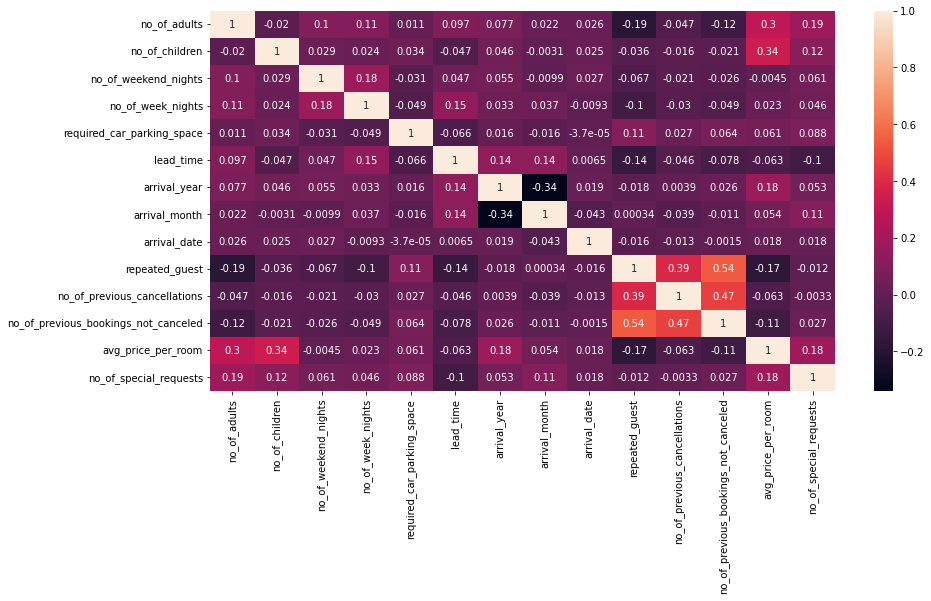

In [13]:
# Determining correlations 
plt.figure(figsize = (14,7));
sns.heatmap(df.corr(), annot = True);

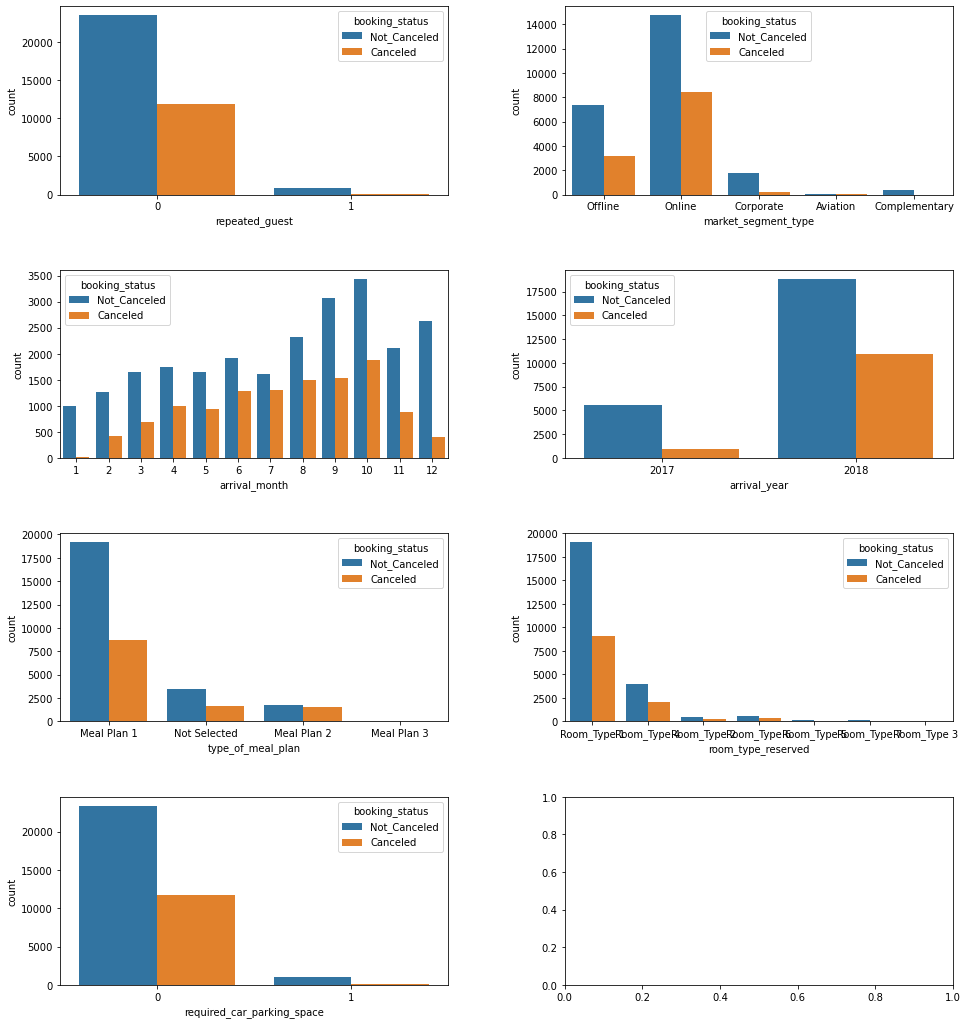

In [20]:
# Relationship between categorical variables and response
fig, ax = plt.subplots(4, 2, figsize=(16, 18));
plt.subplots_adjust(hspace = 0.4, wspace = 0.3);

sns.countplot(data=df, x ='repeated_guest', hue="booking_status", ax=ax[0, 0]);
sns.countplot(data=df,x='market_segment_type',hue='booking_status', ax=ax[0, 1]);
sns.countplot(data=df, x="arrival_month", hue="booking_status", ax=ax[1,0]);
sns.countplot(data=df, x="arrival_year",   hue="booking_status", ax=ax[1,1]);
sns.countplot(data=df, x="type_of_meal_plan",   hue="booking_status", ax=ax[2,0]);
sns.countplot(data=df, x="room_type_reserved",   hue="booking_status", ax=ax[2,1]);
sns.countplot(data=df, x="required_car_parking_space",   hue="booking_status", ax=ax[3,0]);


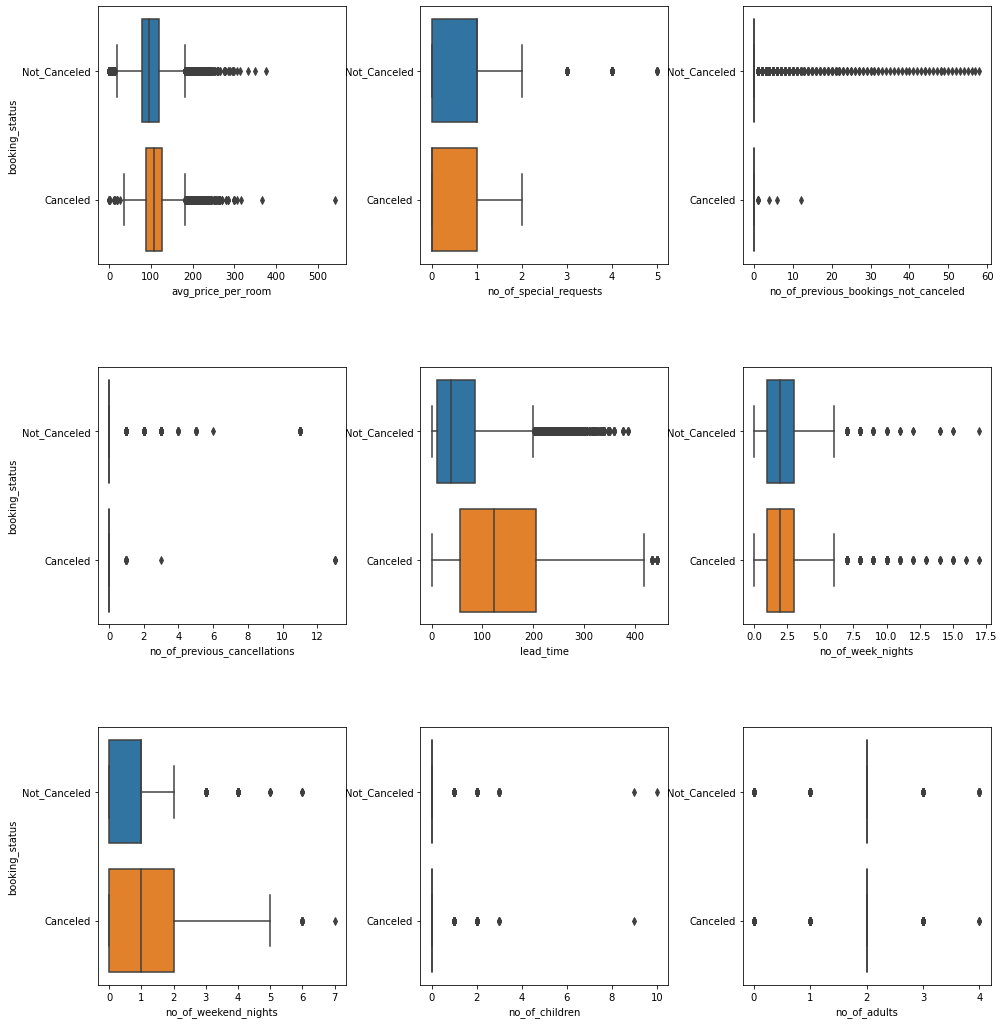

In [22]:
# Relationship between continuous variables and response
fig, ax = plt.subplots(3, 3, figsize=(16, 18));
plt.subplots_adjust(hspace = 0.4, wspace = 0.3);

sns.boxplot(data=df, x ='avg_price_per_room', y ='booking_status', ax=ax[0, 0]);
sns.boxplot(data=df, x ='no_of_special_requests', y ='booking_status', ax=ax[0, 1]).set(ylabel=None);
sns.boxplot(data=df, x ='no_of_previous_bookings_not_canceled', y ='booking_status', ax=ax[0, 2]).set(ylabel=None);
sns.boxplot(data=df, x ='no_of_previous_cancellations', y ='booking_status', ax=ax[1, 0]);
sns.boxplot(data=df, x ='lead_time', y ='booking_status', ax=ax[1, 1]).set(ylabel=None);
sns.boxplot(data=df, x ='no_of_week_nights', y ='booking_status', ax=ax[1, 2]).set(ylabel=None);
sns.boxplot(data=df, x ='no_of_weekend_nights', y ='booking_status', ax=ax[2, 0]);
sns.boxplot(data=df, x ='no_of_children', y ='booking_status', ax=ax[2, 1]).set(ylabel=None);
sns.boxplot(data=df, x ='no_of_adults', y ='booking_status', ax=ax[2, 2]).set(ylabel=None);

In [3]:
# Mapping response to 0 (Not Canceled) and 1 (Canceled)
df['booking_status'].replace(['Canceled', 'Not_Canceled'],[0, 1], inplace=True)

In [13]:
# Proportion of 0 and 1s
df.booking_status.value_counts(1)

1    0.672364
0    0.327636
Name: booking_status, dtype: float64

<AxesSubplot:xlabel='booking_status', ylabel='count'>

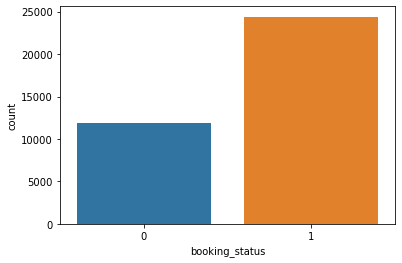

In [14]:
sns.countplot(x = 'booking_status', data = df)

In [24]:
# Correlation of variables with response
df.corrwith(df.booking_status)

no_of_adults                           -0.086920
no_of_children                         -0.033078
no_of_weekend_nights                   -0.061563
no_of_week_nights                      -0.092996
required_car_parking_space              0.086185
lead_time                              -0.438538
arrival_year                           -0.179529
arrival_month                           0.011233
arrival_date                           -0.010629
repeated_guest                          0.107287
no_of_previous_cancellations            0.033728
no_of_previous_bookings_not_canceled    0.060179
avg_price_per_room                     -0.142569
no_of_special_requests                  0.253070
booking_status                          1.000000
dtype: float64

In [8]:
# Convert categorical variables to dummies and append to df 
dummy_market = pd.get_dummies(df.market_segment_type)
dummy_month = pd.get_dummies(df.arrival_month)
dummy_meal = pd.get_dummies(df.type_of_meal_plan)
dummy_room = pd.get_dummies(df.room_type_reserved)

df_dummy = pd.concat([df, dummy_market.drop('Aviation', axis = 1), dummy_month.drop(4, axis = 1), dummy_meal.drop('Meal Plan 3', axis = 1), dummy_room.drop('Room_Type 7', axis = 1)], axis = 1)
df_dummy.columns = df_dummy.columns.astype(str)
df_dummy.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,12,Meal Plan 1,Meal Plan 2,Not Selected,Room_Type 1,Room_Type 2,Room_Type 3,Room_Type 4,Room_Type 5,Room_Type 6
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,...,0,1,0,0,1,0,0,0,0,0
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,...,0,0,0,1,1,0,0,0,0,0
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,...,0,1,0,0,1,0,0,0,0,0
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,...,0,1,0,0,1,0,0,0,0,0
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,...,0,0,0,1,1,0,0,0,0,0


In [26]:
# Remove spaces from column names 
df_dummy.columns = df_dummy.columns.str.replace(' ', '')

# Convert month number to name in columns 
df_dummy.rename(columns={'1': 'January', '2': 'February', '3': 'March', 
                         '5': 'May', '6': 'June', '7': 'July', 
                        '8': 'August', '9': 'September', '10': 'October',
                        '11': 'November', '12': 'December'}, inplace=True)

df_dummy.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,December,MealPlan1,MealPlan2,NotSelected,Room_Type1,Room_Type2,Room_Type3,Room_Type4,Room_Type5,Room_Type6
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,...,0,1,0,0,1,0,0,0,0,0
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,...,0,0,0,1,1,0,0,0,0,0
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,...,0,1,0,0,1,0,0,0,0,0
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,...,0,1,0,0,1,0,0,0,0,0
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,...,0,0,0,1,1,0,0,0,0,0


In [30]:
# Split train and test datasets
y = df_dummy.booking_status
X = df_dummy.drop('booking_status', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, shuffle=True, stratify=y)


In [23]:
# Split train and test datasets
train, test = train_test_split(df_dummy, test_size=0.25, random_state=25, shuffle=True)
train.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,December,MealPlan1,MealPlan2,NotSelected,Room_Type1,Room_Type2,Room_Type3,Room_Type4,Room_Type5,Room_Type6
6093,INN06094,2,0,2,3,Meal Plan 1,0,Room_Type 4,85,2018,...,0,1,0,0,0,0,0,1,0,0
11877,INN11878,1,0,0,3,Meal Plan 1,0,Room_Type 1,166,2018,...,0,1,0,0,1,0,0,0,0,0
27585,INN27586,2,0,2,2,Meal Plan 1,0,Room_Type 2,159,2018,...,0,1,0,0,0,1,0,0,0,0
28306,INN28307,2,0,1,0,Meal Plan 1,0,Room_Type 1,258,2018,...,0,1,0,0,1,0,0,0,0,0
19753,INN19754,2,0,0,3,Meal Plan 1,0,Room_Type 1,116,2018,...,0,1,0,0,1,0,0,0,0,0


In [21]:
test = test.drop('booking_status', axis = 1)

## Baseline Model 
Evaluating model with all predictor variables. Categorical predictors have been transformed to dummy variables. 

In [27]:
# Baseline model with all predictors and no interactions 
baseline_model = sm.logit('booking_status~no_of_adults+no_of_children+no_of_weekend_nights+\
       no_of_week_nights+required_car_parking_space+\
       lead_time+arrival_year+\
       arrival_date+repeated_guest+\
       no_of_previous_cancellations+no_of_previous_bookings_not_canceled+\
       avg_price_per_room+no_of_special_requests+\
       Complementary+Corporate+Offline+Online+January+February+March+May+June+\
       July+August+September+October+November+December+MealPlan1+MealPlan2+\
       NotSelected+Room_Type1+Room_Type2+Room_Type3+\
       Room_Type4+Room_Type5+Room_Type6', data = train).fit()
baseline_model.summary()

         Current function value: 0.406889
         Iterations: 35


C:\Users\hodaf\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         booking_status   No. Observations:                27206
Model:                          Logit   Df Residuals:                    27168
Method:                           MLE   Df Model:                           37
Date:                Wed, 01 Mar 2023   Pseudo R-squ.:                  0.3553
Time:                        18:06:47   Log-Likelihood:                -11070.
converged:                      False   LL-Null:                       -17170.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                              953.3177   3.45e+04      0.028      0.978   -6.67e+04    6.86e+04
no_of_adults                            -0.1417      0.038     -3.735      0.000      -0.216      -0.067
no_of_children                          -0.2050      0.059     -3.451      0.001      -0.321      -0.089
no_of_weekend_nights                    -0.1310      0.020     -6.638      0.000      -0.170      -0.092
no_of_week_nights                       -0.0563      0.012     -4.563      0.000      -0.080      -0.032
required_car_parking_space               1.7396      0.142     12.226      0.000       1.461       2.019
lead_time                               -0.0162      0.000    -57.587      0.000      -0.017      -0.016
arrival_year                            -0.4718      0.062     -7.561      0.000      -0.594      -0.350
arrival_date                            -0.0026      0.002     -1.354      0.176      -0.006       0.001
repeated_guest                           2.0207      0.483      4.181      0.000       1.074       2.968
no_of_previous_cancellations            -0.3279      0.095     -3.465      0.001      -0.513      -0.142
no_of_previous_bookings_not_canceled     0.0903      0.077      1.173      0.241      -0.061       0.241
avg_price_per_room                      -0.0194      0.001    -23.911      0.000      -0.021      -0.018
no_of_special_requests                   1.5720      0.030     51.984      0.000       1.513       1.631
Complementary                           20.6477   3752.665      0.006      0.996   -7334.441    7375.737
Corporate                                0.8690      0.253      3.437      0.001       0.373       1.365
Offline                                  1.9568      0.242      8.088      0.000       1.483       2.431
Online                                   0.1045      0.239      0.438      0.662      -0.363       0.572
January                                  2.2706      0.251      9.051      0.000       1.779       2.762
February                                -0.5317      0.093     -5.726      0.000      -0.714      -0.350
March                                   -0.2699      0.082     -3.303      0.001      -0.430      -0.110
May                                      0.3591      0.081      4.449      0.000       0.201       0.517
June                                     0.1412      0.077      1.843      0.065      -0.009       0.291
July                                     0.2188      0.079      2.779      0.005       0.065       0.373
August                                   0.1996      0.077      2.576      0.010       0.048       0.351
September                                0.3166      0.079      4.013      0.000       0.162       0.471
October                                 -0.0305      0.075     -0.407      0.684      -0.177       0.116
November                                -0.3207      0.083     -3.843      0.000      -0.48

Classification accuracy = 80.6%
Precision = 80.8%
TPR or Recall = 93.3%
FNR = 6.7%
FPR = 45.8%
ROC-AUC = 87.5%


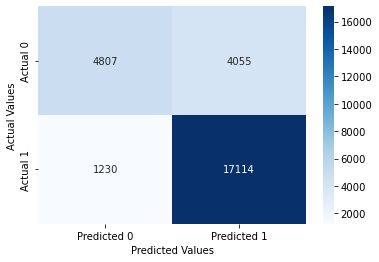

In [30]:
confusion_matrix_data(train, train.booking_status, baseline_model, cutoff = 0.4)

Classification accuracy = 79.8%
Precision = 79.8%
TPR or Recall = 93.3%
FNR = 6.7%
FPR = 47.3%
ROC-AUC = 86.4%


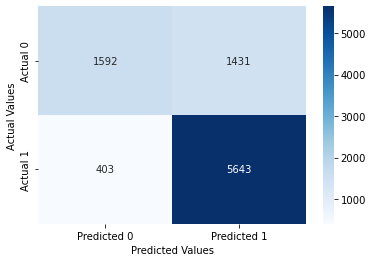

In [32]:
confusion_matrix_data(test, test.booking_status, baseline_model, cutoff = 0.4)

In [29]:
#Function to compute confusion matrix and prediction accuracy on test/train data
def confusion_matrix_data(data,actual_values,model,cutoff=0.5):
#Predict the values using the Logit model
    pred_values = model.predict(data)
# Specify the bins
    bins=np.array([0,cutoff,1])
#Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
# Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    fnr = (cm[1,0])/(cm[1,0]+cm[1,1])
    precision = (cm[1,1])/(cm[0,1]+cm[1,1])
    fpr = (cm[0,1])/(cm[0,0]+cm[0,1])
    tpr = (cm[1,1])/(cm[1,0]+cm[1,1])
    fpr_roc, tpr_roc, auc_thresholds = roc_curve(actual_values, pred_values)
    auc_value = (auc(fpr_roc, tpr_roc))# AUC of ROC
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    print("Precision = {:.1%}".format(precision))
    print("TPR or Recall = {:.1%}".format(tpr))
    print("FNR = {:.1%}".format(fnr))
    print("FPR = {:.1%}".format(fpr))
    print("ROC-AUC = {:.1%}".format(auc_value))

In [110]:
# Logistic regression model with only continuous variables
logit_model = sm.logit('booking_status~no_of_special_requests+lead_time+no_of_weekend_nights+\
no_of_weekend_nights*no_of_week_nights+no_of_previous_cancellations+\
no_of_previous_cancellations*no_of_previous_bookings_not_canceled+\
avg_price_per_room+avg_price_per_room*no_of_adults+avg_price_per_room*no_of_children', data = train).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.466366
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         booking_status   No. Observations:                27206
Model:                          Logit   Df Residuals:                    27192
Method:                           MLE   Df Model:                           13
Date:                Tue, 28 Feb 2023   Pseudo R-squ.:                  0.2627
Time:                        23:08:29   Log-Likelihood:                -12688.
converged:                       True   LL-Null:                       -17208.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================================================================
                                                                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                             5.3143      0.219     24.243      0.000       4.885       5.744
no_of_special_requests                                                1.1224      0.025     44.296      0.000       1.073       1.172
lead_time                                                            -0.0127      0.000    -60.848      0.000      -0.013      -0.012
no_of_weekend_nights                                                 -0.0697      0.029     -2.409      0.016      -0.126      -0.013
no_of_week_nights                                                     0.0221      0.018      1.252      0.211      -0.012       0.057
no_of_weekend_nights:no_of_week_nights                               -0.0453      0.008     -5.757      0.000      -0.061      -0.030
no_of_previous_cancellations                                         -0.0070      0.070     -0.101      0.920      -0.144       0.130
no_of_previous_bookings_not_canceled                                  0.6133      0.174      3.522      0.000       0.272       0.955
no_of_previous_cancellations:no_of_previous_bookings_not_canceled    -0.0501      0.021     -2.393      0.017      -0.091      -0.009
avg_price_per_room                                                   -0.0327      0.002    -17.483      0.000      -0.036      -0.029
no_of_adults                                                         -0.9304      0.108     -8.596      0.000      -1.143      -0.718
avg_price_per_room:no_of_adults                                       0.0065      0.001      7.298      0.000       0.005       0.008
no_of_children                                                       -0.7589      0.121     -6.252      0.000      -0.997      -0.521
avg_price_per_room:no_of_children                                     0.0049      0.001      6.547      0.000       0.003       0.006
=====================================================================================================================================
"""

Classification accuracy = 77.5%
Precision = 77.3%
TPR or Recall = 94.1%
FNR = 5.9%
FPR = 56.6%
ROC-AUC = 82.8%


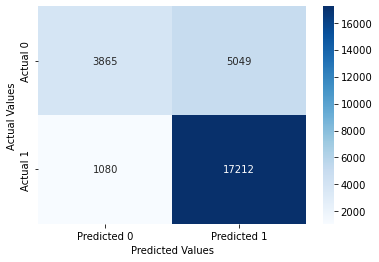

In [111]:
confusion_matrix_data(train, train.booking_status, logit_model, cutoff = 0.4)

Classification accuracy = 76.8%
Precision = 76.8%
TPR or Recall = 93.9%
FNR = 6.1%
FPR = 58.3%
ROC-AUC = 82.6%


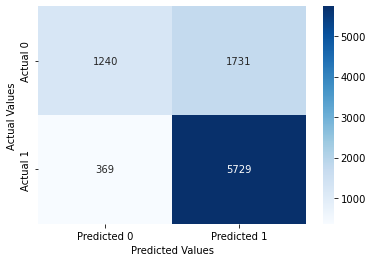

In [112]:
confusion_matrix_data(test, test.booking_status, logit_model, cutoff = 0.4)

In [79]:
# Logistic regression model adding categorical variables
logit_model = sm.logit('booking_status~no_of_special_requests+lead_time+no_of_weekend_nights+\
avg_price_per_room+avg_price_per_room*no_of_adults+avg_price_per_room*no_of_children+\
repeated_guest', data = train).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.467066
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         booking_status   No. Observations:                27206
Model:                          Logit   Df Residuals:                    27196
Method:                           MLE   Df Model:                            9
Date:                Tue, 28 Feb 2023   Pseudo R-squ.:                  0.2616
Time:                        22:26:03   Log-Likelihood:                -12707.
converged:                       True   LL-Null:                       -17208.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             5.2889      0.218     24.312      0.000       4.862       5.715
no_of_special_requests                1.1212      0.025     44.425      0.000       1.072       1.171
lead_time                            -0.0126      0.000    -61.543      0.000      -0.013      -0.012
no_of_weekend_nights                 -0.2188      0.018    -12.366      0.000      -0.253      -0.184
avg_price_per_room                   -0.0323      0.002    -17.261      0.000      -0.036      -0.029
no_of_adults                         -0.8843      0.108     -8.207      0.000      -1.095      -0.673
avg_price_per_room:no_of_adults       0.0063      0.001      7.075      0.000       0.005       0.008
no_of_children                       -0.7423      0.121     -6.122      0.000      -0.980      -0.505
avg_price_per_room:no_of_children     0.0048      0.001      6.405      0.000       0.003       0.006
repeated_guest                        1.8042      0.289      6.252      0.000       1.239       2.370
=====================================================================================================
"""

Classification accuracy = 77.5%
Precision = 77.3%
TPR or Recall = 94.1%
FNR = 5.9%
FPR = 56.7%
ROC-AUC = 82.7%


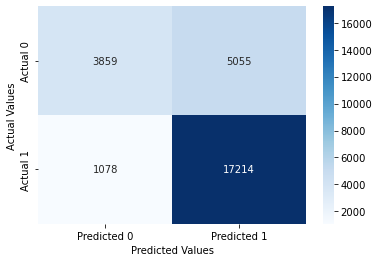

In [80]:
confusion_matrix_data(train, train.booking_status, logit_model, cutoff = 0.4)

Classification accuracy = 76.8%
Precision = 76.8%
TPR or Recall = 93.9%
FNR = 6.1%
FPR = 58.3%
ROC-AUC = 82.6%


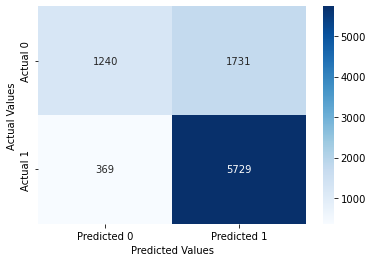

In [109]:
confusion_matrix_data(test, test.booking_status, logit_model, cutoff = 0.4)

In [34]:
#Creating a set of predictors from which we need to find the best subset of predictors
X = train[['no_of_adults', 'no_of_children','no_of_weekend_nights','no_of_week_nights','type_of_meal_plan',
           'required_car_parking_space', 'room_type_reserved','lead_time','arrival_year','arrival_month',
                               'arrival_date','market_segment_type','repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled','avg_price_per_room', 'no_of_special_requests','Complementary',
                                  'Corporate','Offline',
                                     'Online','January',
       'February', 'March', 'May', 'June', 'July', 'August', 'September',
       'October', 'November', 'December', 'MealPlan1', 'MealPlan2',
       'NotSelected', 'Room_Type1', 'Room_Type2', 'Room_Type3', 'Room_Type4',
       'Room_Type5', 'Room_Type6']]

TypeError: Cannot cast Index to dtype int32

In [35]:
#Function to develop a model based on all predictors in predictor_subset
def processSubset(predictor_subset):
    # Fit model on feature_set and calculate R-squared
    model = sm.logit('booking_status~' + '+'.join(predictor_subset),data = train).fit()
    Rsquared = model.rsquared
    return {"model":model, "Accuracy":Rsquared}

In [36]:
#Function to find the best predictor out of p-k predictors and add it to the model containing the k predictors
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]
    
    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['Rsquared'].argmax()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [37]:
def forward_selection():
    models_best = pd.DataFrame(columns=["Rsquared", "model"])

    tic = time.time()
    predictors = []

    for i in range(1,len(X.columns)+1):    
        models_best.loc[i] = forward(predictors)
        predictors = list(models_best.loc[i]["model"].params.index[1:])

    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")
    return models_best

In [38]:
models_best = forward_selection()

Optimization terminated successfully.
         Current function value: 0.627206
         Iterations 5


AttributeError: 'LogitResults' object has no attribute 'rsquared'